In [2]:
import gym

env = gym.make('CartPole-v0')

print('observation', env.observation_space.shape[0])
print('action', env.action_space.n)

for i in range(1):
    state = env.reset()
    done = False
    while not done:
        action = env.action_space.sample()
        state, reward, done, _ = env.step(action)
env.close()

observation 4
action 2


In [87]:
import os
import tensorflow as tf
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt
import gym

class Network:
    def __init__(self, scope):
        with tf.variable_scope(scope):
            self.s = tf.placeholder(tf.float32, [None, N_S])
            self.target_q = tf.placeholder(tf.float32, [None, N_A])
            layer = tf.layers.dense(self.s, 16, activation=tf.nn.relu)
            self.q = tf.layers.dense(layer, N_A, activation=None)
            self.loss = tf.losses.mean_squared_error(self.target_q, self.q)
            
            self.train_op = tf.train.AdamOptimizer(LR).minimize(self.loss)
            
            self.params = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope)

class DQN:
    def __init__(self, load=False, graph=False):
        self.main_net = Network('main')
        self.target_net = Network('target')
        self.sess = tf.Session()
        self.saver = tf.train.Saver()

        if load:
            self.saver.restore(self.sess, PATH + '/tmp/model/model')
            self.epsilon = 0
        else:
            self.update_op = [t_p.assign(m_p) for t_p, m_p in zip(self.target_net.params, self.main_net.params)]
            self.sess.run(tf.global_variables_initializer())
            self.epsilon = 1
            self.replay_memory = deque(maxlen=MAX_MEM)
            self.train_cnt = 0
        
        if graph:
            tf.summary.FileWriter(PATH + '/tmp', self.sess.graph)

    def train(self, epi):
        # state, action, reward, done, next_state
        minibatch = random.sample(self.replay_memory, BATCH_SIZE)
        minibatch = np.array(minibatch)

        target_q = self.sess.run(self.target_net.q, {self.target_net.s: minibatch[:, 4].tolist()})
        updated_q_value = minibatch[:, 2] + GAMMA * np.max(target_q, axis=1) * ~minibatch[:, 3].astype(np.bool)
        target_q = self.sess.run(self.main_net.q, {self.main_net.s: minibatch[:, 0].tolist()})
        target_q[np.arange(len(updated_q_value)), minibatch[:, 1].tolist()] = updated_q_value
        
        self.sess.run(self.main_net.train_op, {self.main_net.s: minibatch[:, 0].tolist(), self.main_net.target_q: target_q})

        self.decay_epsilon(epi)
        self.train_cnt += 1

    def decay_epsilon(self, epi):
        if self.epsilon > 0.1:
            self.epsilon = 1 - epi / MAX_EPI

    def get_action(self, s):
        if np.random.rand() < self.epsilon:
            a = np.random.randint(N_A)
        else:
            q = self.sess.run(self.main_net.q, {self.main_net.s: s[np.newaxis, :]})
            a = np.argmax(q)
        return a

    def save_model(self):
        self.saver.save(self.sess, PATH + '/tmp/model/model')

    def update_target(self):
        self.sess.run(self.update_op)

*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
episode: 0 epsilon 1 step: 17
*** save model ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
*** update target ***
episode: 1 epsilon 1.0 step: 24
episode: 2 epsilon 1.0 step: 18
episode: 3 epsilon 1.0 step: 14
episode: 4 epsilon 1.0 step: 24
episode: 5 epsilon 1.0 step: 29
episode: 6 epsilon 1.0 step: 24
episode: 7 epsilon 1.0 step: 28
episode: 8 epsilon 0.9 

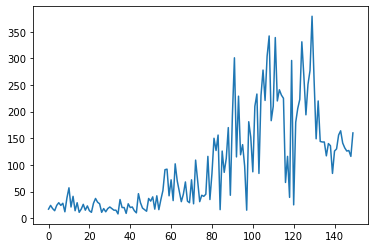

In [88]:
env = gym.make('CartPole-v0')
env._max_episode_steps = 5000
N_S = env.observation_space.shape[0]
N_A = env.action_space.n
PATH = '.'
MAX_EPI = 150
BATCH_SIZE = 32
MAX_MEM = 5000
GAMMA = 0.99
LR = 0.01

tf.reset_default_graph()

agent = DQN()

total_step = []

for i in range(MAX_EPI):
    epi_steps = 0

    state = env.reset()
    done = False
    while not done:
        action = agent.get_action(state)
        next_state, reward, done, _ = env.step(action)
        
        if done:
            reward = -1

        agent.replay_memory.append((state, action, reward, done, next_state))
        state = next_state

        if len(agent.replay_memory) > BATCH_SIZE:
            agent.train(i)

        if agent.train_cnt % 300 == 0:
            agent.update_target()
            print('*** update target ***')

        epi_steps += 1

    total_step.append(epi_steps)

    print('episode:', i, 'epsilon', round(agent.epsilon, 1), 'step:', epi_steps)

    if i % 100 == 0:
        agent.save_model()
        print('*** save model ***')

env.close()

plt.plot(range(len(total_step)), total_step)
plt.show()

In [91]:
tf.reset_default_graph()

agent = DQN(load=True)

for i in range(5):
    epi_steps = 0
    
    state = env.reset()
    done = False
    while not done:
        env.render()
        action = agent.get_action(state)
        state, reward, done, _ = env.step(action)
        epi_steps += 1
    
    print('episode:', i, 'epsilon', round(agent.epsilon, 1), 'step:', epi_steps)
    
env.close()

INFO:tensorflow:Restoring parameters from ./tmp/model/model
episode: 0 epsilon 0 step: 181
episode: 1 epsilon 0 step: 186
episode: 2 epsilon 0 step: 183
episode: 3 epsilon 0 step: 202
episode: 4 epsilon 0 step: 180
